In [ ]:
# EXPERIMENT 6 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# Step 1: Define the Maze Environment
# 0: empty cell, -1: obstacle, 1: goal
maze = np.array([
    [0, 0, 0, -1, 0],
    [0, -1, 0, -1, 0],
    [0, -1, 0, 0, 0],
    [0, 0, -1, -1, 0],
    [0, 0, 0, 0, 1]
])

n_rows, n_cols = maze.shape
n_actions = 4  # Up, Down, Left, Right
actions = ['up', 'down', 'left', 'right']

In [3]:
# Step 2: Initialize Q-Table
Q = np.zeros((n_rows, n_cols, n_actions))

In [4]:
# Step 3: Hyperparameters
alpha = 0.1      # Learning rate
gamma = 0.9      # Discount factor
epsilon = 0.2    # Exploration rate
episodes = 1000

In [9]:
# Step 4: Helper functions
def next_position(row, col, action):
    new_row, new_col = row, col
    if action == 0:  # Up
        new_row -= 1
    elif action == 1:  # Down
        new_row += 1
    elif action == 2:  # Left
        new_col -= 1
    elif action == 3:  # Right
        new_col += 1
    
    # Stay in place if out of bounds or hits obstacle
    if 0 <= new_row < n_rows and 0 <= new_col < n_cols and maze[new_row, new_col] != -1:
        return new_row, new_col
    else:
        return row, col

In [10]:
# Step 5: Q-Learning Algorithm
for episode in range(episodes):
    row, col = 0, 0  # Start position
    while maze[row, col] != 1:
        # Epsilon-greedy action selection
        if random.uniform(0,1) < epsilon:
            action = random.randint(0, n_actions-1)  # Explore
        else:
            action = np.argmax(Q[row, col])          # Exploit
        
        new_row, new_col = next_position(row, col, action)
        
        # Reward
        if maze[new_row, new_col] == 1:
            reward = 100  # Goal
        else:
            reward = -1   # Step cost
        
        # Q-Learning update
        Q[row, col, action] = Q[row, col, action] + alpha * (
            reward + gamma * np.max(Q[new_row, new_col]) - Q[row, col, action]
        )
        
        row, col = new_row, new_col

In [11]:
# Step 6: Extract Optimal Path
row, col = 0, 0
path = [(row, col)]
while maze[row, col] != 1:
    action = np.argmax(Q[row, col])
    row, col = next_position(row, col, action)
    path.append((row, col))

print("Optimal Path from Start to Goal:")
print(path)

Optimal Path from Start to Goal:
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


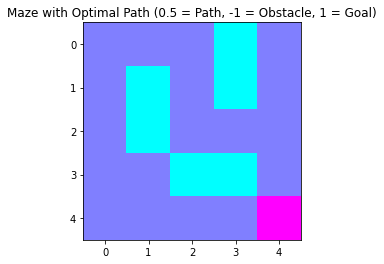

In [12]:
# Step 7: Visualize Path
path_maze = maze.copy()
for r, c in path:
    if path_maze[r, c] != 1:
        path_maze[r, c] = 0.5  # Mark path

plt.imshow(path_maze, cmap='cool', interpolation='nearest')
plt.title("Maze with Optimal Path (0.5 = Path, -1 = Obstacle, 1 = Goal)")
plt.show()